# Environment Check

Check that environment containing quantum libaries is being used.
qc jupyter kernel is running using libraries in the conda environent

In [1]:
! conda env list

# conda environments:
#
base                     /Users/eve/anaconda3
Code                     /Users/eve/anaconda3/envs/Code
python39              *  /Users/eve/anaconda3/envs/python39



In [2]:
import sys
print(sys.executable)

/Library/Developer/CommandLineTools/usr/bin/python3


In [3]:
! jupyter kernelspec list

Available kernels:
  python3    /Users/eve/Library/Python/3.9/share/jupyter/kernels/python3


# Homework 2: Basic Quantum Programs

First, we will begin by importing Qiskit, IBM's quantum computing software that is written in Python! To create an experiment and run it, we will need to use Qiskit's Circuits, Registers, and Compilers. Programming using qiskit allows us to programmatically extend QASM code to use for loops and if statements to design circuits faster.  QASM is an assembler-like instruction set that allows you to specify quantum circuits.

#### Import libraries and simulator
Aes is a backend simulator for the IBM quantum computers (other backends are run on real QC). Numpy is good with arrays and matrices. pyplot is for visualization of probability distributions.

In [4]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, assemble
import matplotlib.pyplot as plt
import numpy as np


print('qiskit vers.= %s'%qiskit.__version__)

qiskit vers.= 0.25.1


Setting __AER backends(simulators)__:\
the `qasm_simulator` simulates a true backend and gets the probabilistic results using shots;\
the `statevector_simulator` returns an actual ideal vector of probabilities\

In [5]:
#settings and backends
shots = 1024
simulator = Aer.get_backend('qasm_simulator')
state_vector_sim = Aer.get_backend('statevector_simulator')

## 1. Demo: Superposition

First, we will demonstrate __quantum superposition__. This will be accomplished using a one-qubit quantum circuit that has a single gate: the __Hadamard operation__, $\mathbf{H}$. The qubit is initialized to the computational __basis vector__ $|0\rangle$ and is then applied to the Hadamard gate.  Whenever the resulting __state vector__ for the evolved wavefunction is examined, it is observed that the __probability amplitudes__ for both $|0\rangle$ and $|1\rangle$ are equal to $\frac{1}{\sqrt{2}}$, indicating __maximal superposition__ of the qubit. 

`QuantumCircuit` stores data registers \
`QuantumRegister` are where the qubit values are initialized and stored.\
`ClassicalRegister` are used to store the results of quantum registers when measured.\
`qc.measure(qr,cr)` is used to measure and put quantum result in register\
Commands `qc.h` are the Hadamard gate.


STATEVECTOR:  Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))

QUANTUM CIRCUIT DIAGRAM:


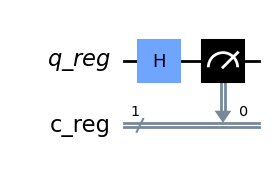

In [6]:
qr = QuantumRegister(1, 'q_reg')   # 量子寄存器
cr = ClassicalRegister(1, 'c_reg')  # 经典寄存器
qc = QuantumCircuit(qr, cr)      # qr,cr 两个量子比特的量子电路

qc.h(qr[0]) # 给qr第0个比特加一个H门

#Must find state vector for wavefunction before you add measurement operators!
#(Measurement operators cause wavefunction collapse)
state_vector = execute(qc,state_vector_sim).result()
vector = state_vector.get_statevector(qc)
print('\nSTATEVECTOR: ', vector)

qc.measure(qr, cr) # 建立从量子到经典的映射,相当于把测量结果移至经典道.这行代码将量子寄存器的量子比特测量并将结果存储到经典寄存器中。测量操作会导致量子系统坍缩到一个确定的状态.

print('\nQUANTUM CIRCUIT DIAGRAM:')
qc.draw(output="mpl")      # 处于可视化的目的, 使用量子电路的draw函数进行电路绘图, 向draw函数传入参数mpl使得作图更加美观

We can see the opensource QASM assembly code specification of the circuit.

In [7]:
print('\nQASM SPECIFICATION:')
for i in qc.qasm():
    print(i,end='')

# qc.qasm() 会返回一个字符串，描述该量子电路的 QASM 
# 表示。由于字符串是一个可迭代对象，for i in qc.qasm(): 将会遍历这个字符串中的每一个字符，然后 print(i, end='') 会逐字符打印这个字符串。
# end='' 是为了确保每个字符都是连续打印，而不是每打印一个字符就换一行


QASM SPECIFICATION:
OPENQASM 2.0;
include "qelib1.inc";
qreg q_reg[1];
creg c_reg[1];
h q_reg[0];
measure q_reg[0] -> c_reg[0];


A __measurement operation__ placed after the Hadamard gate causes it to collapse into one of the computational basis states. We are measuring in the __Pauli-Z__ measurement basis. We will simulate this circuit 1,024 times (this is called the number of __"shots"__ in the IBMQ environment). The measurement operator "observes" the quantum information and places the measurement output into the classical register. Once the circuit is complete with registers, a state transformation, and a measurement operation, experiments will be run using the Qiskit Aer simulator. Note how after each run, the output distribution varies slightly, but is close to a 50/50 split between the basis states $|0\rangle$ and $|1\rangle$ whenever the input quantum state is in a basis state.


SIMULATION RESULTS:
Simulation distribution 0: {'0': 499, '1': 525}


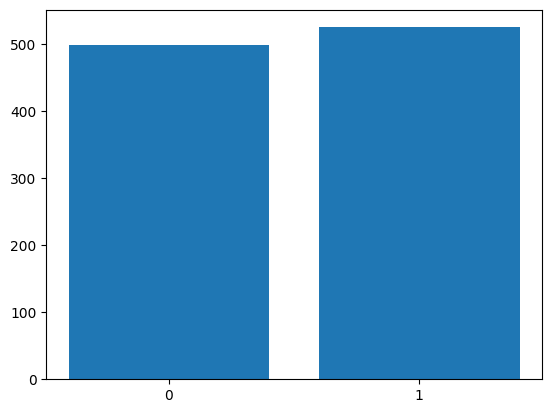

Simulation distribution 1: {'0': 508, '1': 516}


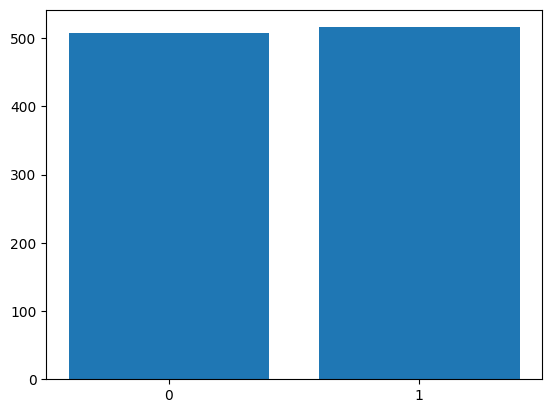

Simulation distribution 2: {'0': 533, '1': 491}


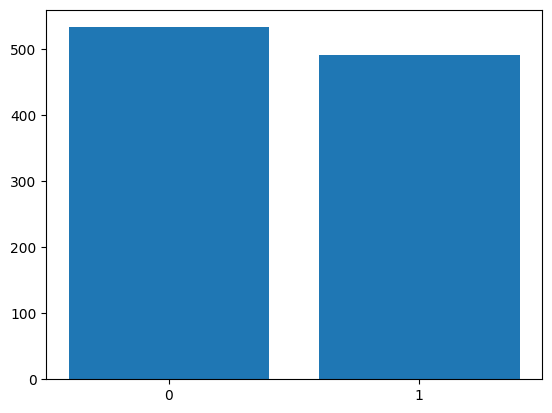

In [8]:
print('\nSIMULATION RESULTS:')
for i in range(0,3):           # 循环三次模拟
    job = execute(qc,simulator,shots=shots)
    result = job.result()       # 获取模拟结果
    counts = result.get_counts(qc) 
    print('Simulation distribution %d:'%i, counts)   # 打印并绘制结果
    plt.bar(counts.keys(),counts.values()) # counts.keys() 包含所有可能的测量结果（在这个情况下是 '0' 和 '1'），counts.values() 包含每个结果的计数。
    plt.show() # plt.show() 会显示条形图

## 2. Rotations X and Z

We will experiment with Pauli-__X__ and Pauli-__Z__; known as the bit flip and phase flip operators. Pauli __Y__ gate can be considered as a bit and phase flip gate 


STATEVECTOR:  Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

QUANTUM CIRCUIT DIAGRAM:


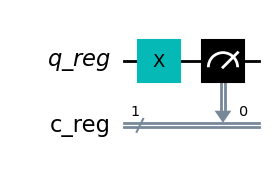

In [9]:
# 这些行初始化一个量子寄存器（包含一个量子比特）和一个经典寄存器（包含一个经典比特），并创建一个量子电路
qr = QuantumRegister(1, 'q_reg')
cr = ClassicalRegister(1, 'c_reg')
qc = QuantumCircuit(qr, cr)

# 这行代码在第一个（也是唯一的）量子比特上应用了Pauli-X门，执行比特翻转
qc.x(qr[0])

#Must find state vector for wavefunction before you add measurement operators!
#(Measurement operators cause wavefunction collapse)
state_vector = execute(qc,state_vector_sim).result()    # 执行该量子电路并获取其状态向量
vector = state_vector.get_statevector(qc) # 状态向量是一个复数向量，展示了每个基础状态的复振幅
print('\nSTATEVECTOR: ', vector)

# 量子比特上添加了一个测量操作，将量子比特的状态映射到经典比特
qc.measure(qr, cr)

print('\nQUANTUM CIRCUIT DIAGRAM:')
qc.draw(output="mpl")

We can see the value is flipped to ket 1


SIMULATION RESULTS:
Simulation distribution 0: {'1': 1024}


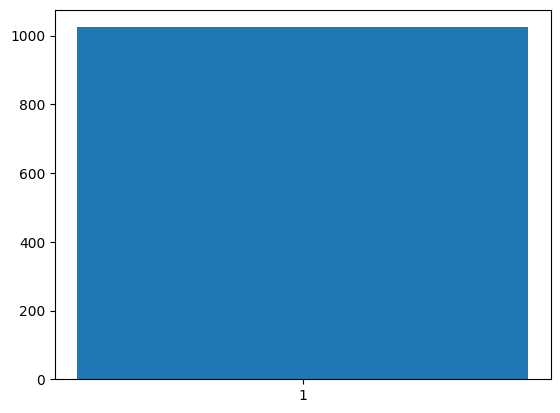

In [10]:
print('\nSIMULATION RESULTS:')
for i in range(0,1):                        # 只执行一次的循环，因为 range(0,1) 只包含一个元素 0
    job = execute(qc,simulator,shots=shots) # qc 是之前定义的量子电路，simulator 是模拟器的实例，shots 是模拟的次数
    result = job.result()
    counts = result.get_counts(qc)    # 获取模拟的计数并打印它们。计数是一个字典，其中包含了测量结果和它们各自出现的次数
    print('Simulation distribution %d:'%i, counts)
    plt.bar(counts.keys(),counts.values()) # 用 matplotlib（plt）生成一个条形图，并立即显示它。这个条形图显示了每个测量结果的计数
    plt.show()

### 2.1 Phase flip

In [11]:
qr = QuantumRegister(1, 'q_reg')
cr = ClassicalRegister(1, 'c_reg')
qc = QuantumCircuit(qr, cr)
# 创建了一个量子寄存器，包含一个量子比特，和一个经典寄存器，包含一个经典比特。然后，使用这两个寄存器初始化了一个量子电路

qc.z(qr[0])
# 在第一个（且唯一的）量子比特上应用了Pauli-Z门. Pauli-Z门是一种量子逻辑门，它代表着一个相位翻转


STATEVECTOR:  Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))

QUANTUM CIRCUIT DIAGRAM:

SIMULATION RESULTS:
Simulation distribution 0: {'0': 1024}


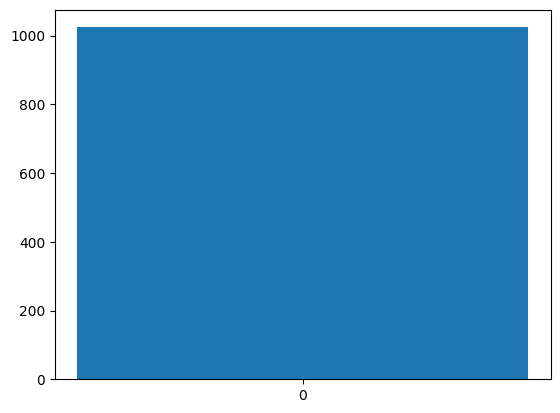

In [12]:
#Must find state vector for wavefunction before you add measurement operators!
#(Measurement operators cause wavefunction collapse)
# 量子电路上执行模拟来获取状态向量，并将其打印到控制台
state_vector = execute(qc,state_vector_sim).result()
vector = state_vector.get_statevector(qc)
print('\nSTATEVECTOR: ', vector)

qc.measure(qr, cr) # 量子比特上应用测量操作，并将其结果存储到经典寄存器中

print('\nQUANTUM CIRCUIT DIAGRAM:')
qc.draw(output="mpl")
print('\nSIMULATION RESULTS:')
for i in range(0,1):
    job = execute(qc,simulator,shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    print('Simulation distribution %d:'%i, counts)
    plt.bar(counts.keys(),counts.values())
    plt.show()

### 2.2 Question 1: Why is the phase flip not changing the probability? Implement a Pauli-X using Hadamard and Pauli-Z gates only and test measurement.

Insert the answer to Question 1 HERE

Why is the phase flip not changing the probability?

Solution: $Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$. When applied to a qubit in the state $\left | 0 \right \rangle$ , it leaves the state unchanged $Z\left | 0 \right \rangle = \left | 0 \right \rangle$. Similarly, when applied to a qubit in the state $\left | 1 \right \rangle$, it also leaves the state unchanged: $Z \left | 1 \right\rangle = - \left | 1 \right \rangle$ The phase flip gate, often denoted as the Pauli-Z gate (Z gate), does not change the probability of measurement outcomes in the computational basis states $\left | 0 \right \rangle$ and $\left | 1 \right \rangle$. This is because the Pauli-Z gate is a diagonal gate, and its action preserves the computational basis states. 

Probability Interpretation: In quantum mechanics, the probability of measuring a particular state is determined by the square magnitude of the complex probability amplitude associated with that state.

The probability of measuring state $\left | X \right \rangle $ is given by $\left| \left \langle X | \Psi \right \rangle \right|^2 $, where $\left | \Psi \right \rangle $ is the quantum state and $\left \langle X \right |$ is the complex conjugate of $\left | X \right \rangle$.

When we apply the Pauli-Z gate to $\left | 0 \right \rangle$ or $\left | 1 \right \rangle$, the probabilities remain the same because the magnitudes of the probability amplitudes do not change. In the case of $\left | 0 \right \rangle$, $Z\left | 0 \right \rangle=\left | 0 \right \rangle$, so the probability of measuring $\left | 0 \right \rangle$ remains 1. In the case of $\left | 1 \right \rangle, Z\left | 1 \right \rangle = - \left | 1 \right \rangle$, but the probability is still 1 because the square magnitude of $-\left | 1 \right \rangle$ is the same as $\left | 1 \right \rangle$.

In summary, the Pauli-Z gate does not change the probabilities of measuring $\left | 0 \right \rangle$ or $\left | 1 \right \rangle$ because it is a diagonal gate that only introduces a phase factor (a global phase) to the states, and the probabilities are determined by the magnitude of the probability amplitudes, which remains unchanged.

Implement a Pauli-X using Hadamard:
$$X=HZH$$


STATEVECTOR:  Statevector([6.123234e-17+0.j, 1.000000e+00+0.j],
            dims=(2,))

QUANTUM CIRCUIT DIAGRAM:


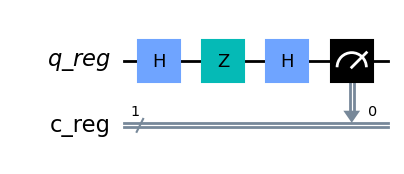

In [13]:
# Initialize Quantum Circuit
qr = QuantumRegister(1, 'q_reg')
cr = ClassicalRegister(1, 'c_reg')
qc = QuantumCircuit(qr, cr)

# Implementing Pauli-X using H, Z and H gates
qc.h(qr[0]) # Apply Hadamard gate
qc.z(qr[0]) # Apply Pauli-Z gate
qc.h(qr[0]) # Apply Hadamard gate again

state_vector = execute(qc, state_vector_sim).result()
vector = state_vector.get_statevector(qc)
print('\nSTATEVECTOR: ', vector)

# Measure the qubit
qc.measure(qr,cr)

print('\nQUANTUM CIRCUIT DIAGRAM:')
qc.draw(output='mpl')


SIMULATION RESULTS:
Simulation distribution 0: {'1': 1024}


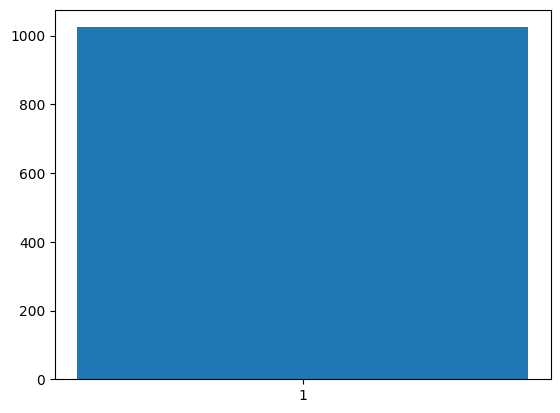

In [14]:
print('\nSIMULATION RESULTS:')
for i in range(0,1):
    job = execute(qc, simulator, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    print('Simulation distribution %d:'%i, counts)
    plt.bar(counts.keys(), counts.values())
    plt.show()

------------------------------------------------------------------------------

### 2.3 Parameterized rotations
Qiskit has parameterized rotations `rx, ry, rz`.
The most generalized qubit is the `U3` operator in Qiskit

In [15]:
from math import pi, sqrt

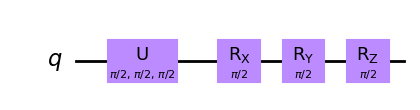

In [16]:
qc = QuantumCircuit(1)     # 创建一个包含一个量子比特的量子电路, 并在这个量子比特上应用几个不同的旋转门
qc.u(pi/2, pi/2, pi/2, 0) # 这行代码在第0个量子比特上应用一个u门，其中θ=π/2、ϕ=π/2和λ=π/2。u门是单量子比特门的最通用形式.
qc.rx(pi/2,0) # 第0个量子比特上应用一个rx门，其中旋转角度θ=π/2。rx门绕x轴旋转量子比特
qc.ry(pi/2,0) # 在第0个量子比特上应用一个ry门，其中旋转角度θ=π/2。ry门绕y轴旋转量子比特
qc.rz(pi/2,0) # 在第0个量子比特上应用一个rz门，其中旋转角度θ=π/2。rz门绕z轴旋转量子比特
qc.draw(output="mpl") # 绘制这个量子电路的图表

### 2.4 Question 2: Create a Hadamard gate using only the rx,ry,rz functions.

Insert the answer to Question 2 HERE

\begin{align*}
H = R_z(\frac{\pi}{2}) \cdot R_y(\frac{\pi}{2}) \cdot R_z(\frac{\pi}{2})
\end{align*}

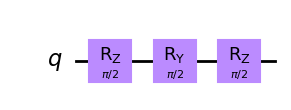

In [17]:
qc = QuantumCircuit(1)

# Creating Hadmard gate using Rx Rz and Ry rotations
qc.rz(pi/2,0)
qc.ry(pi/2,0)
qc.rz(pi/2,0)

# Draw the circuit
qc.draw(output="mpl")

---------------------------------------------------------------------------------------------------------------------

## 3. Multiqubit Systems and Specified Rotations Visualized
We now experiment with multiqubit systems.


STATEVECTOR:  Statevector([-6.49467042e-17-0.35355339j, -6.49467042e-17-0.35355339j,
              2.16489014e-17+0.35355339j,  2.16489014e-17+0.35355339j,
              2.16489014e-17+0.35355339j,  2.16489014e-17+0.35355339j,
              2.16489014e-17-0.35355339j,  2.16489014e-17-0.35355339j],
            dims=(2, 2, 2))

QUANTUM CIRCUIT DIAGRAM:


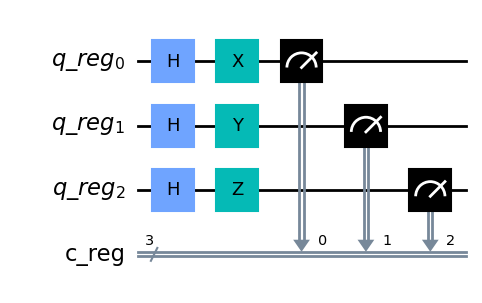

In [18]:
qr2 = QuantumRegister(3, 'q_reg')    # 一个含有三个量子比特的量子寄存器 qr2
cr2 = ClassicalRegister(3, 'c_reg') # 一个相应的三个经典比特的经典寄存器 cr2
qc2 = QuantumCircuit(qr2, cr2) # 在这些寄存器的基础上建立了一个量子电路 qc2
qc2.h(qr2[0])    # 第一个量子比特首先经过一个Hadamard门，把它变成一个均匀的量子叠加态
qc2.x(qr2[0])    # 它经过一个Pauli-X门（也被称为NOT门），这会翻转它的基态

qc2.h(qr2[1])    # 第二个量子比特也首先经过一个Hadamard门
qc2.y(qr2[1])    # 接着，它经过一个Pauli-Y门，这是一个同时进行比特和相位翻转的门

qc2.h(qr2[2])    # 第三个量子比特首先经过Hadamard门 
qc2.z(qr2[2])    # 然后经过一个Pauli-Z门，也叫相位翻转门

state_vector2 = execute(qc2,state_vector_sim).result()
vector2 = state_vector2.get_statevector(qc2)
print('\nSTATEVECTOR: ', vector2)

qc2.measure(qr2, cr2) #在所有三个量子比特上进行测量，并将测量结果存储在相应的经典寄存器中

print('\nQUANTUM CIRCUIT DIAGRAM:')
qc2.draw(output="mpl")

### 3.1 Question 3: Notice the statevector size is increased. What calculation results in the increased size? What is the growth rate relationship between statevector size and number of qubits, and what is one implication of this?

Insert the Answer to Question 3 HERE

What calculation results in the increased size? 

Solution:If a quantum system consists of 1 qubit, there are $2^1 = 2$ possible state: $\left | 0 \right \rangle$ and $\left |1 \right \rangle$
If a quantum system consists of 2 qubits, there are $2^2 = 4$ possible states: $\left|00\right \rangle, \left|01\right \rangle, \left|10\right \rangle, \left|11\right \rangle$
For 3 quibts, there are $2^3 = 8$ possibles states, and so on.

What is the growth rate relationship between statevector size and number of qubits?

Solution: The growth rate of the statevector size, relative to the number of qubits, is exponential. Specifically, the statevector grows as $2^n$, where $n$ is the number of qubits.

What is one implication of this?

Solution: One significant implication of this exponential growth is that it leads to challenges in simulating quantum systems on classical computers. Since the memory requirement grows exponentially with the number of qubits, simulating a moderately large number of qubits (e.g., around 50 qubits) can become infeasible due to the limitations of available memory and processing power on classical computers. This phenomenon illustrates the concept of "quantum supremacy," where quantum computers can outperform classical computers in specific tasks, due to their inherent parallelism and ability to exist in multiple states simultaneously.

------------------------------------------------------------------------

## 4. Run Hadamard on a Real Quantum Computer

To use this notebook, you must copy your API token from the "My Account" page on the IBMQ Experience.

Create an IBMQ account and run a Hadamard gate. https://github.com/Qiskit/qiskit-ibmq-provider

More information about the tokens is available in the instructions document for this homework.  Also, be aware that the
commented out "IBMQ.save_account(token)" should be uncommented the first time you run this code since your token will be
saved to your local disk drive.  You can comment out this line afterward, since your token will have already been saved.

Also note that, running this code more than once in the same session will cause a warning to be issued when the 
"provider=IBMQ.load_account()" is re-executed since your account will have already been loaded the first time.
You can ignore this warning.


In [23]:
# from qiskit import IBMQ
from qiskit import *
from qiskit.tools.monitor import job_monitor
# from qiskit.providers.ibmq import least_busy
from qiskit_ibm_provider import least_busy

#paste your token from the IBM Q here
token = "595c5f1347c3585c62e1399c6db106ced8c8bcddaf6122e5e021503d5cbac17e9e573815f78ea0ea90540b6a4d0eea11a6fbd7fff0e5a124fa64a2a0e05e6577"

# The following statement 'save.account' only needs to be run once, since your token will be saved to disk
IBMQ.save_account(token)
try:
    provider = IBMQ.load_account()
    backend = provider.get_backend('ibmq_qasm_simulator')    # 选择一个用于执行的后端, 此处是态矢后端 这行代码选择一个用于执行量子电路的后端。在这个例子中，我们选择了 IBM Q 的量子模拟器作为后端。
    
except:
    print(
        """WARNING: No valid IBMQ credentials found on disk.
             You must store your credentials using IBMQ.save_account(token, url).
             For now, there's only access to local simulator backends..."""
    )
    exit(0)
    pass


configrc.store_credentials:WARNING:2023-09-26 22:46:32,620: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-09-26 22:46:33,047: Credentials are already in use. The existing account in the session will be replaced.


This shows the types of ibm backend cloud devices. Note that each backend has a specific qubit architecture.

In [24]:
#see a list of available remote backends
ibmq_backends = provider.backends()    # 使用提供者（provider）对象的 backends() 方法来获取所有可用的远程后端列表。
print("Remote backends: ", ibmq_backends) #将所有可用的远程后端打印到控制台

Remote backends:  [<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]


We will select the least busy backend with at least 2 qubits

In [25]:
# allocate the least busy device with at least 2 qubits
# 这部分会从所有可用后端中筛选出具有至少两个量子比特且非模拟器的设备
# least_busy 函数会在筛选出来的设备中找到当前最不繁忙的一个。所谓“最不繁忙”是指在等待队列中的任务最少.
try:
    least_busy_device = least_busy(
        provider.backends(filters=lambda x: x.configuration().n_qubits >= 2, simulator=False)
    ) 
except:
    print("All devices are currently unavailable.")

    #如果因某种原因（例如，所有设备都不可用或全部处于忙碌状态）无法分配设备，这段代码会捕获异常并输出一条错误消息

In [26]:
# Output selected device based on least queue/load
print("Running on current least busy device: ", least_busy_device)

Running on current least busy device:  ibm_nairobi


### Question 4: Describe the specific IBM backend you will use above and the transmon qubit properties.

Insert the answer to Question 4 HERE

In [27]:
backend_properties = least_busy_device.properties()
# Getting the number of qubits on the device
backend_configuration = least_busy_device.configuration()
number_of_qubits = backend_configuration.n_qubits

# Looping over each qubit and printing its properties
for i in range(number_of_qubits):
    print(f"Properties for qubit {i}:")
    t1 = backend_properties.t1(i)  # # T1 relaxation time
    t2 = backend_properties.t2(i)  # T2 dephasing time
    freq = backend_properties.frequency(i)  # Frequency of the qubit
    readout_error = backend_properties.readout_error(i)  # Readout error on the qubit
    
    print(f"  T1 time: {t1} s")
    print(f"  T2 time: {t2} s")
    print(f"  Frequency: {freq} GHz")
    print(f"  Readout error: {readout_error}")
    print()  # for a new line between qubits

Properties for qubit 0:
  T1 time: 7.557103652580821e-05 s
  T2 time: 3.113622364181209e-05 s
  Frequency: 5260489456.010003 GHz
  Readout error: 0.02639999999999998

Properties for qubit 1:
  T1 time: 0.00011960939700892233 s
  T2 time: 8.801809812463766e-05 s
  Frequency: 5170437511.98673 GHz
  Readout error: 0.022199999999999998

Properties for qubit 2:
  T1 time: 5.832815794943079e-05 s
  T2 time: 7.825274916592134e-05 s
  Frequency: 5274334515.510893 GHz
  Readout error: 0.035800000000000054

Properties for qubit 3:
  T1 time: 9.05262633902708e-05 s
  T2 time: 8.393426184787788e-05 s
  Frequency: 5026675974.471919 GHz
  Readout error: 0.02069999999999994

Properties for qubit 4:
  T1 time: 7.29877946538641e-05 s
  T2 time: 6.247984935186454e-05 s
  Frequency: 5177196853.600869 GHz
  Readout error: 0.017100000000000004

Properties for qubit 5:
  T1 time: 0.00012110718621315838 s
  T2 time: 1.753910963359433e-05 s
  Frequency: 5292519786.654765 GHz
  Readout error: 0.102700000000000

Solution: The current least busy device is ibm_lagos and the IBM backend has 7 qubits, each with the properties described above. For instance, qubit 0 has a T1 time of approximately 
$4.9\times 10 ^{-5}$ seconds, a T2 time of approximately $3.3 \times 10^{-5}$ seconds, a frequency of 5235 MHz, and a readout error of 0.0109. On the other hand, qubit 6 has a T1 time of approximately 0.0001265 seconds, a T2 time of approximately 0.000148 seconds, a frequency of 5063 MHz, and a readout error of 0.0205.



-------------------------------------------------------------------------


STATEVECTOR:  Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))

QUANTUM CIRCUIT DIAGRAM:


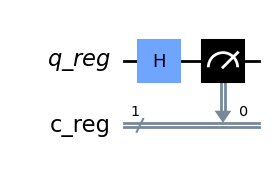

In [28]:
# Qiskit package imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit import execute, IBMQ, BasicAer



qr = QuantumRegister(1, 'q_reg')  # qr 包含一个量子比特和一个经典寄存器
cr = ClassicalRegister(1, 'c_reg')  # cr 包含一个经典比特
qc = QuantumCircuit(qr, cr)    # 电路 qc 现在包含了一个量子比特和一个经典比特

qc.h(qr[0])   # 将H门应用于 qr 寄存器中的第一个比特（索引为0）

#Must find state vector for wavefunction before you add measurement operators!
#(Measurement operators cause wavefunction collapse)
state_vector_sim = Aer.get_backend('statevector_simulator')   # new add if not wrong
state_vector = execute(qc,state_vector_sim).result()
vector = state_vector.get_statevector(qc)
print('\nSTATEVECTOR: ', vector)

qc.measure(qr, cr)

print('\nQUANTUM CIRCUIT DIAGRAM:')
qc.draw(output="mpl")


QUANTUM CIRCUIT DIAGRAM:
         ┌───┐┌─┐
  q_reg: ┤ H ├┤M├
         └───┘└╥┘
c_reg: 1/══════╩═
               0 

QASM CIRCUIT SPECIFICATION:
OPENQASM 2.0;
include "qelib1.inc";
qreg q_reg[1];
creg c_reg[1];
h q_reg[0];
measure q_reg[0] -> c_reg[0];

ACTUAL EXECUTION RESULTS:
Actual execution distribution 0: {'0': 511, '1': 513}


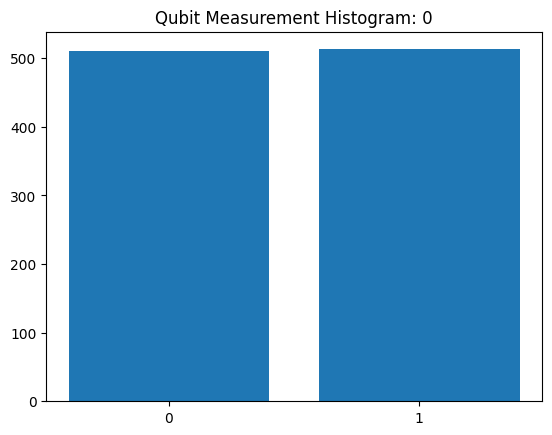

Actual execution distribution 1: {'1': 497, '0': 527}


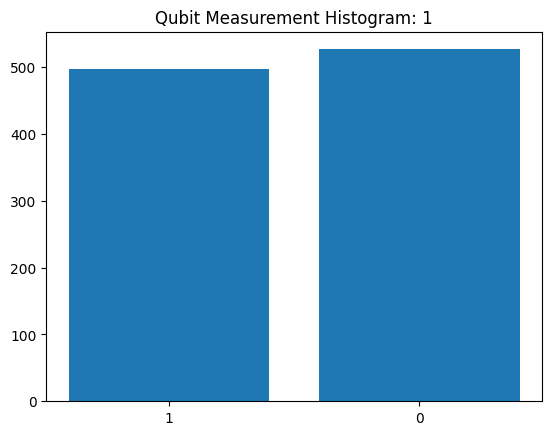

ibmqjob._wait_for_completion:ERROR:2023-09-27 09:18:01,865: Maximum retries exceeded: Error checking job status due to a network error.


IBMQJobApiError: 'Error checking job status due to a network error: "HTTPSConnectionPool(host=\'api.quantum-computing.ibm.com\', port=443): Max retries exceeded with url: /api/Network/ibm-q/Groups/open/Projects/main/Jobs/cma39gezs01g008frakg/status/v/1 (Caused by NewConnectionError(\'<urllib3.connection.HTTPSConnection object at 0x166a1b130>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known\'))"'

In [35]:
# output the specified quantum circuit
print('\nQUANTUM CIRCUIT DIAGRAM:')   
print(qc.draw())
print('\nQASM CIRCUIT SPECIFICATION:')
for i in qc.qasm(): # 循环遍历 qc.qasm() 中的每一行，并打印出量子电路的QASM规范。QASM（Quantum Assembly Language）是一种用于描述量子电路的文本表示方式
    print(i,end='')
    
# execute the quantum circuit and output the results of the execution
print('\nACTUAL EXECUTION RESULTS:')
for i in range(0,3):
    job_exp = execute(qc, least_busy_device, shots=1024, max_credits=10)  
    #job_exp = execute(qc, least_busy_device, shots=1024)
    result_exp = job_exp.result()
    counts = result_exp.get_counts(qc)
    print('Actual execution distribution %d:'%i, counts)
    plt.bar(counts.keys(),counts.values())
    #plt.title("Qubit Measurement Histogram: "+i)
    plt.title("Qubit Measurement Histogram: "+str(i))
    plt.show()

### Question 5: Describe any systematic/random errors in the histogram distributions between the ideal simulator and the quantum computer. What can be causing these differences (or the lack thereof)?

Insert the answer to Question 5 HERE

Solution: In the histogram distributions between the ideal simulator and the quantum computer, there can be both systematic and random errors. Here are the possible reasons for these differences (or the lack thereof):

Systematic Errors:

Noise and Error Correction: Real quantum computers are affected by noise, including issues like decoherence, gate operation errors, and readout errors. While quantum error correction methods are employed to reduce these errors, there still exists some level of systematic error.
Calibration Differences: Hardware components of quantum computers may have slightly different properties due to calibration variations. For example, the frequency of qubits may differ slightly between different quantum computers, affecting the accuracy of gate operations.
Random Errors:

Measurement Errors: Quantum computers may introduce some random errors during the measurement operations, leading to slight variations in measurement results between different runs.
Initial State: The initial state of quantum computers can vary due to factors like thermal effects and environmental conditions, resulting in random differences between runs.
Quantum Randomness: Quantum mechanics inherently involves randomness, so even with the same input, quantum computers may produce slightly different outputs due to the probabilistic nature of quantum states.
Reasons for Lack of Differences:

High-Quality Hardware and Calibration: If the quantum computer has very high-quality hardware and precise calibration, systematic and random errors may be minimized, making differences less noticeable in the histograms.
Limited Number of Shots: If only a small number of measurement shots are used, random errors may overshadow systematic errors. Increasing the number of measurement shots can help reduce random errors.
Error Correction: Modern quantum computers typically employ error correction techniques to reduce systematic errors. Therefore, the differences observed in histograms may be influenced by error correction.
In summary, the differences in histograms can be attributed to a combination of systematic and random errors, as well as factors related to the quality of quantum hardware, calibration, and the number of measurement shots. To better understand and harness quantum computers, a thorough investigation and analysis of these differences are required.

---------------------------------------------------------------------------------------------------------

## 5. Export this Jupyter notebook to html and submit it by emailing to erhenderson@smu.edu, hendersonj@smu.edu, and mitch@smu.edu.